In [1]:
import matplotlib.pyplot as plt

from synthlearners import Synth, SynthMethod
from synthlearners.simulator import (
    SimulationConfig,
    PanelSimulator,
    FactorDGP,
)


from synthlearners.plotting import SynthPlotter, plot_simulation_results

In [4]:
# Setup simulation
config = SimulationConfig(N=100, T=50, T_pre=40, treatment_effect=2.0)
simulator = PanelSimulator(config)
Y, Y_0, L, treated_units = simulator.simulate()

In [5]:
# Fit multiple synthetic controls
synth_methods = [
    Synth(method="lp_norm", p=1.0),
    Synth(method="lp_norm", p=2.0),
    Synth(method="linear"),
    Synth(method="simplex"),
]

results = [method.fit(Y, treated_units, config.T_pre) for method in synth_methods]

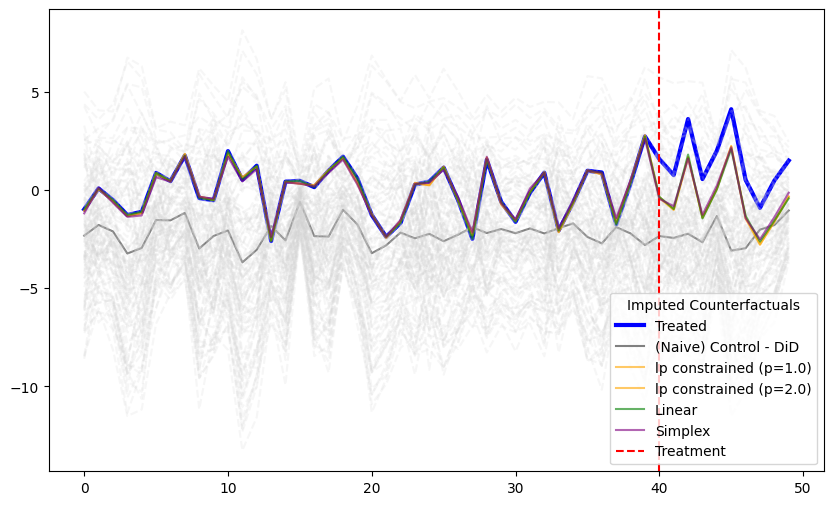

In [6]:
# Create plot
plotter = SynthPlotter()
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plotter.plot_trajectories(
    results, Y, treated_units, config.T_pre, ax=ax, show_controls=True
)
plt.show()

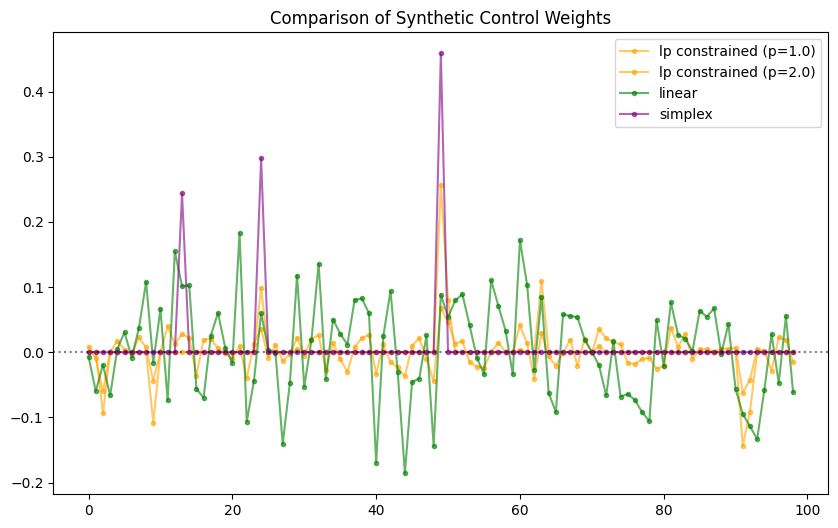

In [7]:
# Plot weights comparison
plotter.plot_weights(results, plot_type="comparison")
plt.show()